<h1> <b> DSCI 100 Final Project: <br>
    Predicting the ATP Rankings </b> </h1>





<h2> Introduction </h2>

The Assocation of Tennis Professionals is the governing body for international professional men's tennis tournaments. The ATP maintains a widely recognized ranking of professional tennis players based on their past results. For example, Serbian tennis superstar Novak Djokovic currently sits atop of the ATP rankings, while the highest ranking Canadian, Felix Auger-Aliassime, ranks 11th. For this project, we will be making use of an Assocation of Tennis Profesionals (ATP) dataset to predict players' ATP ranking. Generally speaking, the goal of this project is to develop a regression model which can predict the ATP rank of a player given past information about players and matches. Examples of predictor variables include age of the player, ATP rank points, height of the player, and so on and so forth.

The dataset we are using has been compiled from Jeff Slackmans Github page (https://github.com/JeffSackmann/tennis_atp). The dataset contains information regarding players, the match, and the tournament the match was played in. The dataset itself is limited from 2017-2019. However, the ATP ranking formula/system has not changed since then. Therefore, we can test the accuracy of our model by testing its predictive ability on the current rankings of players. For instance, we can attempt to use our model to predict Felix Auger-Aliassime's ranking in 2021.

We are asking a regression question, as we are attempting to discern if one or more variables can be used to predict a numerical variable of interest, in this case, where one would expect a player of a particular height, age, and rank points to be ranked by the ATP relative to their peers.

<h2> Methods and Results </h2>

To begin, our dataset must be loaded from its original source on the web. Then, the data must be wrangled to fit the requirements needed for this project:

In [1]:
#Loading the dataset 

library(tidyverse)
library(tidyr)
library(tidymodels)
library(dplyr)
library(digest)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)

url <- "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"

ATP_data <- read_csv(url)
ATP_data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2885,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,⋯,53,29,11,11,4,11,18,2235,76,667


There are several columns which we can reasonably anticipate will not effect our predictions, and therefore are not in the scope of our question. These columns should be removed. Examples of such columns include tourney_level, draw_size, match_num, etc. Certain columns may be useful in answering the predicitive question, but are categorical in nature. These variables have also been removed to allow for a smoother analysis when answering the predicitive question. Examples of such columns include winner_hand and loser_hand

In [2]:
#select the columns necessary from the dataset

ATP_data_trimmed <- select(ATP_data, winner_ht, winner_age, loser_ht, loser_age, winner_rank, winner_rank_points, loser_rank, loser_rank_points)
ATP_data_trimmed

winner_ht,winner_age,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
178,29.00479,NA,22.88569,9,3590,16,1977
NA,22.88569,188,33.70568,16,1977,239,200
178,29.00479,188,31.88227,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
188,32.59411,178,33.68925,15,2320,76,667
163,26.95414,188,32.59411,7,3775,15,2320
185,23.73990,178,33.68925,18,2235,76,667


After removing those extra columns, this dataset is relatively clean. However, there are some observations that contain 'NA' values, which make the data untidy, therefore, all rows with an NA value should be removed:

In [3]:
#drop_na function is an easy way to drop rows with NA values

library(tidyr)
ATP_data_tidy <- drop_na(ATP_data_trimmed)
ATP_data_tidy

winner_ht,winner_age,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
178,29.00479,188,31.88227,9,3590,40,1050
178,29.00479,188,27.62765,9,3590,19,1835
188,31.88227,193,23.67967,40,1050,35,1125
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
188,32.59411,178,33.68925,15,2320,76,667
163,26.95414,188,32.59411,7,3775,15,2320
185,23.73990,178,33.68925,18,2235,76,667


As indicated by the column titles, this dataset has grouped players based on the outcomes of their matches. However, to answer our predicitve question, we don't need to pay particular attention to whether or not a player won a given match, just their attributes after the match.

Therefore, to truly get this data into a tidy format, we need to combine like-for-like columns between the winner cateogries and the loser categories, as several of these categories are a part of the same variable for the purposes of this analysis. An example would be combining the winner_age column with the loser_age column, as they both account for the age of the players.

Our data has to go from wide to long to be considered 'tidy' for the purposes of this project:

In [4]:
#Seperate the data into two dataframes, one for the 'winner' group and one for the 'loser' group by selecting columns based on the title of columns
#This is done with the goal of recombining the columns into one, with common variables held under one column. I.e. winner_ht and loser_ht under height

#The select argument is used to select winner and loser columns in the dataframe to make new dataframes out of

ATP_data_tidy_win <- ATP_data_tidy %>% 
    select(winner_ht, winner_age, winner_rank, winner_rank_points)

#In order to use the rbind function to later to combine the dataframes, the columns in each dataset need to have the same names
#Therefore, the columns are renamed using the rename function to have the 'winner' or 'loser' tag removed

ATP_data_tidy_win_renamed <- ATP_data_tidy_win %>%
rename(height = winner_ht,
      age = winner_age,
      rank = winner_rank,
      rank_points = winner_rank_points)

ATP_data_tidy_loser <- ATP_data_tidy %>%
    select(loser_ht, loser_age, loser_rank, loser_rank_points)

ATP_data_tidy_loser_renamed <- ATP_data_tidy_loser %>%
rename(height = loser_ht,
      age = loser_age,
      rank = loser_rank,
      rank_points = loser_rank_points)

#rbind is used to combine, or attach, two dataframes which have the same column names. The rows of one dataframe will be placed after the other

ATP_data_tidy_combined <- rbind(ATP_data_tidy_win_renamed, ATP_data_tidy_loser_renamed)
ATP_data_tidy_combined

height,age,rank,rank_points
<dbl>,<dbl>,<dbl>,<dbl>
178,29.00479,9,3590
178,29.00479,9,3590
188,31.88227,40,1050
⋮,⋮,⋮,⋮
178,33.68925,76,667
188,32.59411,15,2320
178,33.68925,76,667


Now we have created a dataframe which has combined both the 'winner' and 'loser' data. This data is clean because: Each column is a single variable, each value is a single cell, and each row is a unqiue observation. Each row applies to a particular player after a partiuclar match. All relevant numerical variables provided to us by the dataset are featured in our 'cleaned' dataframe. Our strata/target variable, rank, is included in our 'cleaned' dataframe.

We can use this dataframe to develop a regression model which will predict a players' rank based on their age, height and rank points.

To build a regression model, we first need to seperate the data into training and testing datasets. Split the data using 75% of the ATP_data_tidy_combined as the training set and set rank as the strata argument. Store this data into an object called ATP_split. The 25% of the ATP_data_tidy_combined is then the testing set. Set.seed is used to make the whole process reproducible. 

In [5]:
set.seed(1)
ATP_split <- initial_split(ATP_data_tidy_combined, prop = 0.75, strata = rank)
ATP_training <- training(ATP_split)
ATP_testing <- testing(ATP_split)

The code block below shows a collection of graphs to better understand the relationships we expect to see with all the variables. Our Height and age showing a general bell curve graph meaning modesty would be best whilst obviously the better your rank is (lower number) the higher your rank points value. This visualization will give us the basis for our data analysis as we continue to play around with our data and create our regression model.

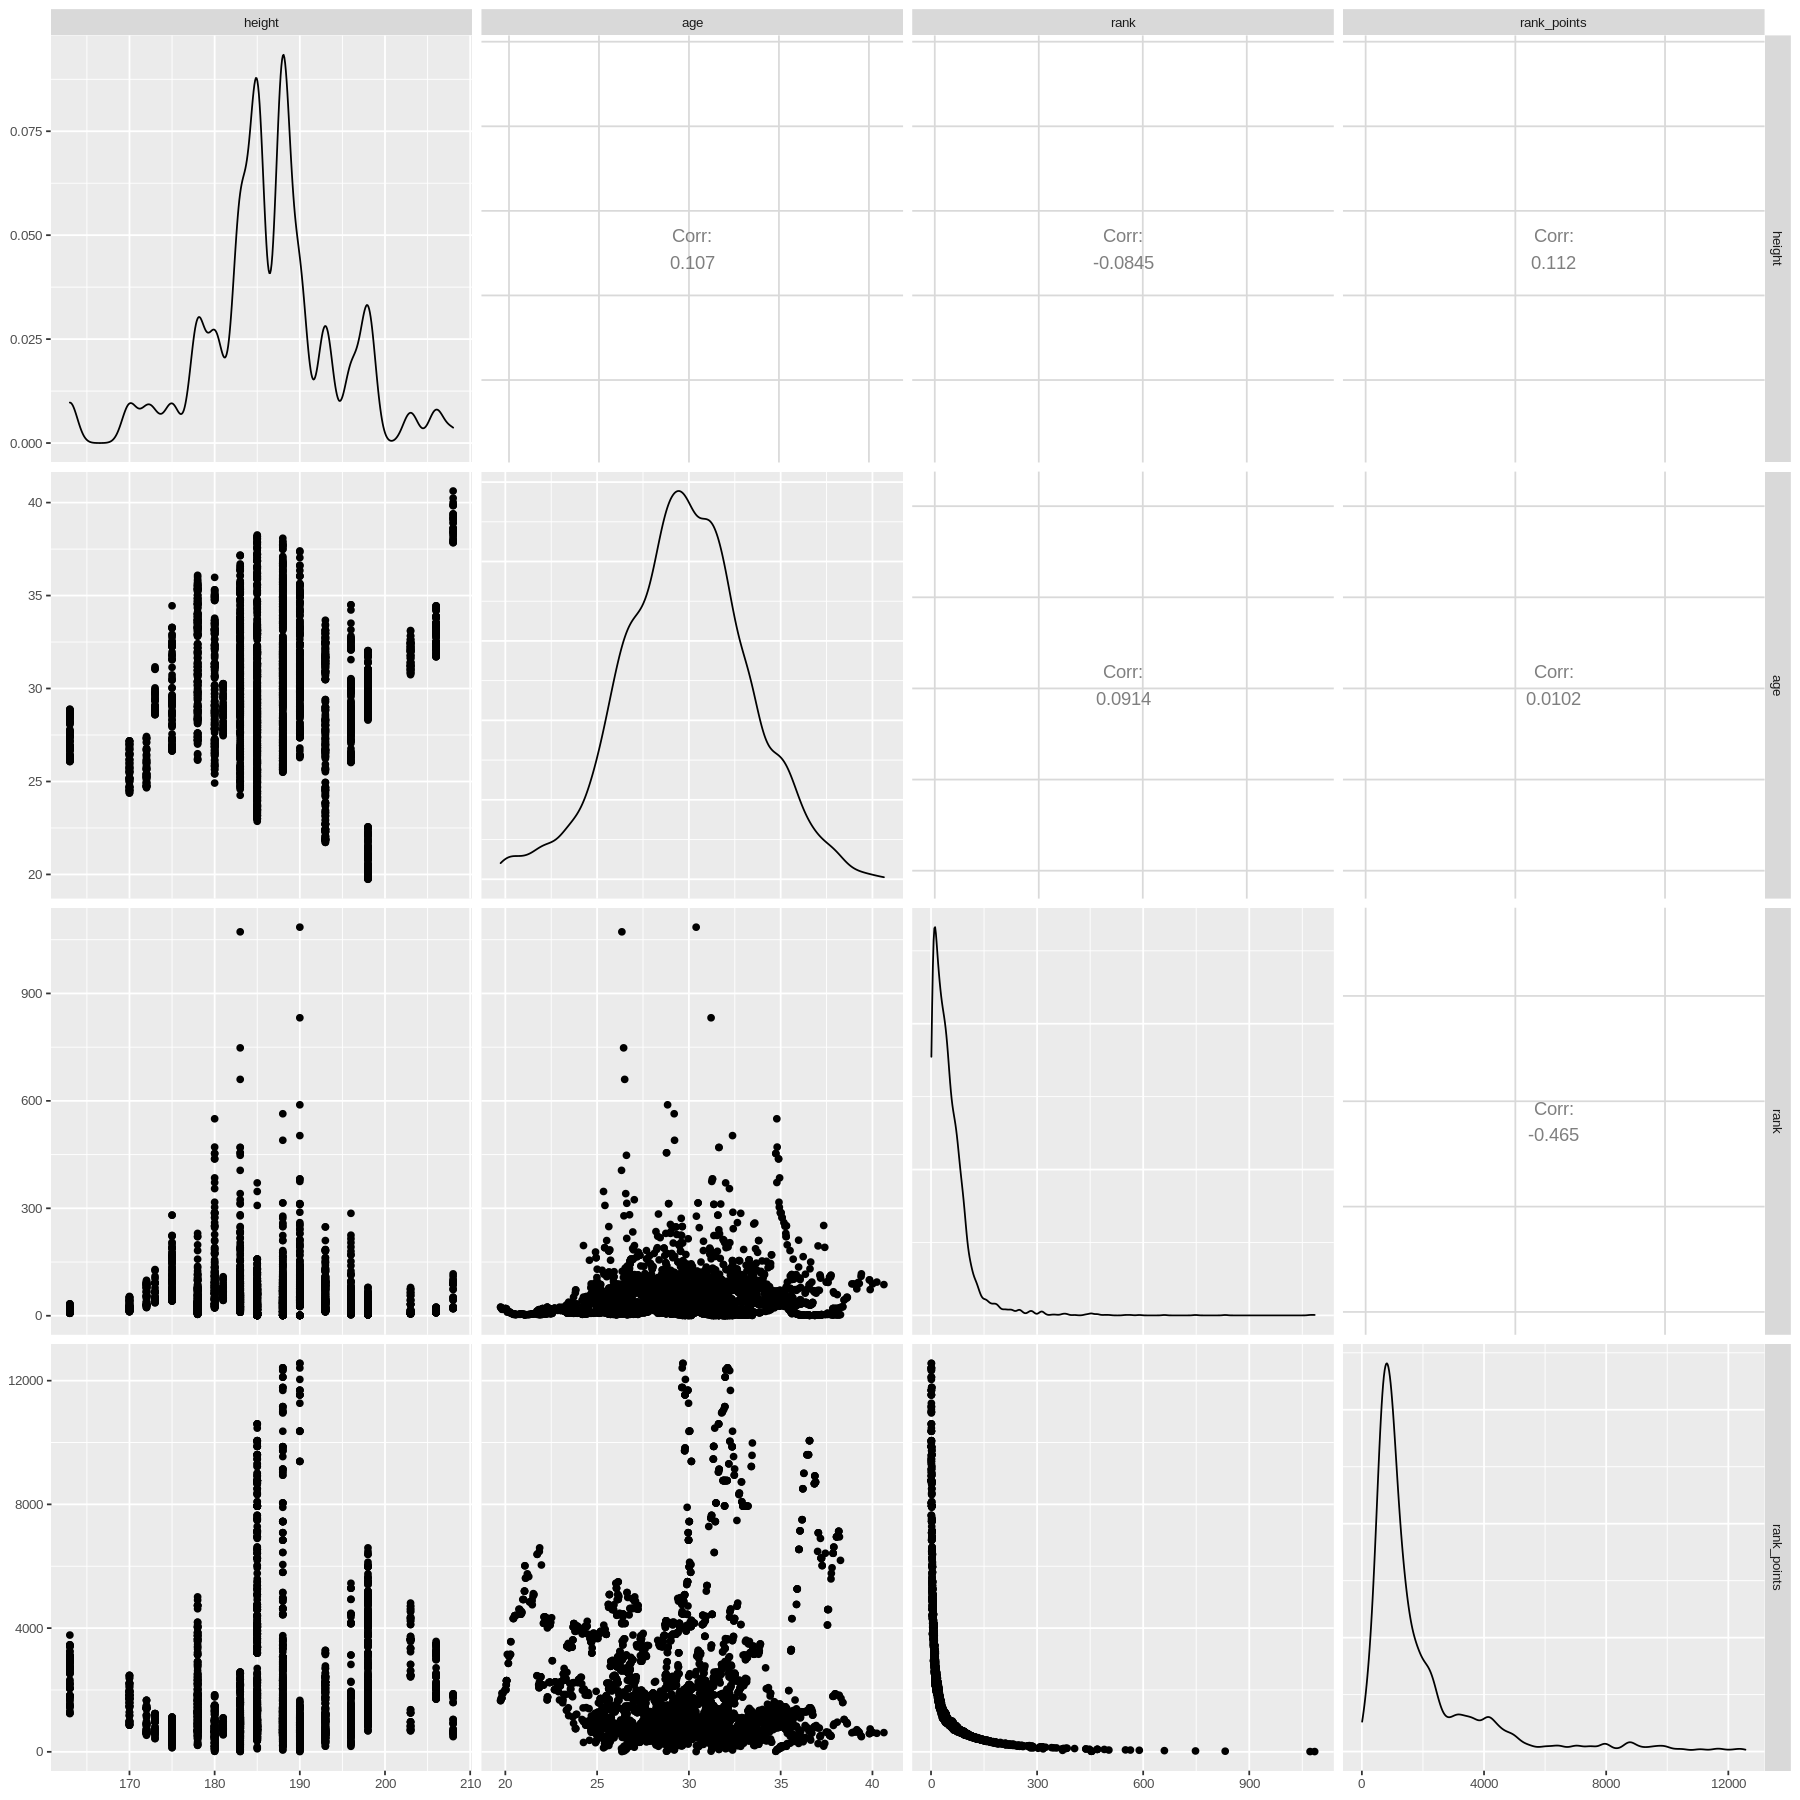

In [6]:
options(repr.plot.width = 15, repr.plot.height = 15)
ATP_eda <- ggpairs(ATP_training) +
theme(text=element_text(size=10))
ATP_eda

Next, we’ll use cross-validation on our training data to choose  𝑘 . We will use RMPSE to use the K with the highest acccuracy. If the prediction values are very close to the true values, the RMSPE will be small; if the prediction values are not very close to the true values, the RMSPE will be quite large.

To perform a cross-validation, we first create a model specification for  𝑘 -nn. We want to use the straight-line distance for kknn and set_mode("regression") in the model specification because we are dealing with a regression problem. The model specification is stored in in an object called ATP_spec.

Then, we need to create a recipe to preprocess our data. The recipe is stored in ATP_recipe The recipe should specify that the response variable is the player's rank and the predictors are the players' height, age, and rank_point.

Similar to previous step, set.seed is used to make the whole process reproducible. 

In [7]:
set.seed(1) #DO NOT REMOVE

ATP_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

ATP_recipe <- recipe(rank ~., data = ATP_training) %>%
           step_scale(all_predictors()) %>%
           step_center(all_predictors())

Now, we are performing a cross-validation with 5 folds to create 5 classifiers with the training data. 

In [8]:
set.seed(1) # DO NOT REMOVE
ATP_vfold <- vfold_cv(ATP_training, v = 5, strata = rank)
ATP_workflow <- workflow() %>%
  add_recipe(ATP_recipe) %>%
  add_model(ATP_spec)

Now, we are using RMSPE to find the best setting for  𝑘  from our workflow. We use 200 values to test 𝑘: we create a tibble called gridvals with a column called neighbors that contains a sequence of values, 1 to 200. 

Next, we tune workflow, which will test all the values in gridvals and resamples using the cross-validation data set. 

In [ ]:
set.seed(1) # DO NOT CHANGE
gridvals <- tibble(neighbors = seq(1, 200))
ATP_results <- ATP_workflow %>%
  tune_grid(resamples = ATP_vfold, grid = gridvals) %>%
  collect_metrics() 
ATP_results

Now we are finding the minimum RMSPE to help us find the number of neighbors that will serve as our best  𝑘  value.

In [ ]:
set.seed(1) # DO NOT REMOVE

ATP_min <- ATP_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    slice(1)
ATP_min

Now we know the best k value to use in kknn specification is 3. We will then use is k value to re-train the k-nn regression model on the training data set.

Following that, we will repeat the workflow analysis again with the best k value. 

Then, we will use the predict function to make predictions on the test data, and use the metrics function to compute a summary of the regression's quality. 

In [ ]:
k_min <- ATP_min %>%
          pull(neighbors)

ATP_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

ATP_best_fit <- workflow() %>%
          add_recipe(ATP_recipe) %>%
          add_model(ATP_best_spec) %>%
          fit(data = ATP_training)

ATP_summary <- ATP_best_fit %>%
           predict(ATP_testing) %>%
           bind_cols(ATP_testing) %>%
           metrics(truth = rank, estimate =.pred)%>%
           filter(.metric == 'rmse')
ATP_summary

Our final model’s test error as assessed by RMSPE is 45.15489, meaning that we expect the error in our prediction to be roughly 45.15489 in ranking. Below is the visualization for our K-nearest neighbour model so that we can see how our model is evaluating the data and we can test our project question underneath.

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)

ATP_preds <- ATP_best_fit %>%
predict(ATP_training) %>%
bind_cols(ATP_training)

ATP_plot <- ggplot(ATP_training, aes(x = height, y = rank)) +
geom_point(alpha = 0.5) +
geom_hline(yintercept = 193, linetype = "dotted") +
geom_line(alpha = 0.75, data = ATP_preds,
          mapping = aes(x = height, y = .pred),
          color = "blue") +
xlab("Height (in cm)") +
ylab("Rank") +
ggtitle("Height over Rank Graph") +
theme(text=element_text(size=20))

ATP_plot

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)

ATP_plot2 <- ggplot(ATP_training, aes(x = age, y = rank)) +
geom_point(alpha = 0.5) +
geom_hline(yintercept = 21, linetype = "dotted") +
geom_line(alpha = 0.75, data = ATP_preds,
          mapping = aes(x = age, y = .pred),
          color = "blue") +
xlab("Age (in years)") +
ylab("Rank") +
ggtitle("Age over Rank") +
theme(text=element_text(size=20))

ATP_plot2

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)

ATP_plot3 <- ggplot(ATP_training, aes(x = rank_points, y = rank)) +
geom_point(alpha = 0.5) +
geom_hline(yintercept = 11, linetype = "dotted") +
geom_line(alpha = 0.75, data = ATP_preds,
          mapping = aes(x = rank_points, y = .pred),
          color = "blue") +
xlab("Rank Points") +
ylab("Rank") +
ggtitle("Rank points over Rank Graph") +
theme(text=element_text(size=20))

ATP_plot3

The general trend we see with the data is similar to what we expected to find with all our variables and the blue lines are representing how our knn-regression us choosing it's values based on the closest k-min values. Our lowest error margin was given with a neighbour value of 3 and multple variables come into account when making the prediction we want to make on our dataset. We can see in the above plots by visualizing Felix Auger-Aliassime's actual variable values with the use of plot lines, we can see that the estimations are very close for Rank points and Age but we are not able to visualize multidiensional data that well so the above plots are representing of the various possibilities we get with our model but our model is able to give predictions within a range of 45 ranks.